In [92]:
import pandas as pd
data = pd.read_excel('/content/drive/My Drive/New-MRI/data.xls')
data

,age,sex,Cp,trestbps,chol,fbs,restecg,thalach,exang,Oldpeak,slope,ca,Thal,Diagnosis
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,1,4,145,282,0,2,142,1,2.8,2,2,7,2
295,55,0,4,120,188,0,0,113,0,1.4,2,1,7,2
296,46,0,2,130,219,0,2,188,0,0.0,1,0,3,1
297,45,1,4,112,290,0,2,153,0,0.0,1,1,3,2


In [0]:
dataset_data=data.loc[:, data.columns != 'Diagnosis'].values
dataset_labels =  data['Diagnosis'].values
from sklearn.linear_model import LogisticRegression

In [94]:
clf = LogisticRegression(random_state=0).fit(dataset_data, dataset_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [95]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf,dataset_data, dataset_labels, cv=5)
scores

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0.83333333, 0.83333333, 0.83333333, 0.8       , 0.77966102])

In [96]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.82 (+/- 0.04)


In [97]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(clf,dataset_data, dataset_labels, cv=5)

import pandas as pd
df_cm = pd.DataFrame(cm)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


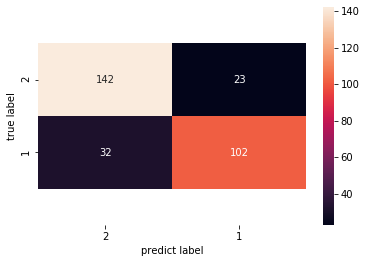

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
labels = [1,2]
cm = confusion_matrix(dataset_labels, y_pred, labels)
ax = sns.heatmap(df_cm, annot=True ,fmt="d") 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_xticklabels([2] + labels)
ax.set_yticklabels([2] + labels)
plt.xlabel('predict label')
plt.ylabel('true label' )
plt.show()

In [100]:
tn, fp, fn, tp = confusion_matrix(dataset_labels, y_pred).ravel()
specificity = tn / (tn+fp)
print(specificity)
sensitivity =  tp / (tp + fn)
print(sensitivity) 

0.8606060606060606
0.7611940298507462
